# Model comparison pipeline

- Pipeline components:
    - normalisation + scaling
    - imputation
    - ML model

- Took care that `random seeds` are fixed, so models get compared with the same split!

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

from modelsClassifier import fit_modelComparison

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

# Classification pipeline

In [2]:
datasetTimepoint = "12_sterol_discoveryValidation"
target = "disease_severity"
#### Feature selection:
vars = "boruta" #boruta #allSterols
varPath = f"../../results/featureSelection/{datasetTimepoint}/{vars}.txt"
#### All Features:
#varPath = f"../../results/featureSelection/{datasetTimepoint}/allSterols.txt"

''' 
Define paths
'''
resultsPath = f"../../results/prediction/featureSelection/{datasetTimepoint}/{vars}/modelComparison"
os.makedirs(resultsPath, exist_ok=True)
dataPath = "../../results/preprocessing/cleaned"
dataset = f"{datasetTimepoint}_{target}_cleaned.csv"

In [3]:
''' 
Read data
'''
data = pd.read_csv(f"{dataPath}/{dataset}", index_col=0)
X = data.drop(target, axis=1)
y = data[target]

''' 
Read in variables
'''
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()

''' 
Run pipeline

--model: RandomForest, LogReg, KNN, GBoost, MLP

'''
for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    estimators, score = fit_modelComparison(X, y, target, sel_variables, model=model, randomState=11, outerCV=10)

    ### Save
    score["model"] = np.repeat(model, len(score["fit_time"]))
    pd.DataFrame.from_dict(score).to_csv(f"{resultsPath}/{model}_score.csv", index=None) 

    ### Save feature importances if possible
    if model == "RandomForest":
        columnOrderAfterPreprocessing = estimators[0].best_estimator_["selector"].get_feature_names()
        fi_rf = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
        df_fi_rf = pd.DataFrame(fi_rf, columns=["fi", "var"]).sort_values("fi", ascending=False)    
        df_fi_rf.to_csv(f"{resultsPath}/{model}_featureImportance.csv", index=None)


Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...



/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged ye

# Comparison of all models

In [33]:
df_scores = pd.DataFrame()

for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    df = pd.read_csv(f"{resultsPath}/{model}_score.csv")
    df_scores = pd.concat([df_scores, df], axis=0, ignore_index=True)

df_scores

,fit_time,score_time,test_acc,test_b_acc,test_recall,test_precision,test_roc_auc_micro,test_roc_auc_macro,test_f1,test_f1_micro,test_f1_macro,test_f1_weighted,test_fbeta,model
0,4.176500,0.134091,0.872727,0.650000,1.000000,0.865385,0.795556,0.795556,0.927835,0.872727,0.694687,0.843054,0.969828,RandomForest
1,2.894664,0.044664,0.781818,0.555556,0.911111,0.836735,0.731111,0.731111,0.872340,0.781818,0.561170,0.759188,0.895197,RandomForest
2,2.848731,0.191473,0.833333,0.550000,1.000000,0.830189,0.635227,0.635227,0.907216,0.833333,0.544517,0.772883,0.960699,RandomForest
3,1.285790,0.028838,0.836364,0.550000,1.000000,0.833333,0.553333,0.553333,0.909091,0.836364,0.545455,0.776860,0.961538,LogReg
4,1.290121,0.011410,0.818182,0.500000,1.000000,0.818182,0.500000,0.500000,0.900000,0.818182,0.450000,0.736364,0.957447,LogReg
5,1.347647,0.011751,0.814815,0.500000,1.000000,0.814815,0.743182,0.743182,0.897959,0.814815,0.448980,0.731670,0.956522,LogReg
6,1.021537,0.026560,0.836364,0.627778,0.955556,0.860000,0.631111,0.631111,0.905263,0.836364,0.652632,0.813397,0.934783,KNN
7,0.901448,0.012951,0.800000,0.488889,0.977778,0.814815,0.637778,0.637778,0.888889,0.800000,0.444444,0.727273,0.940171,KNN
8,0.914521,0.013259,0.796296,0.488636,0.977273,0.811321,0.615909,0.615909,0.886598,0.796296,0.443299,0.722413,0.938865,KNN
9,9.858992,0.025470,0.800000,0.605556,0.911111,0.854167,0.708889,0.708889,0.881720,0.800000,0.617331,0.785579,0.899123,GBoost


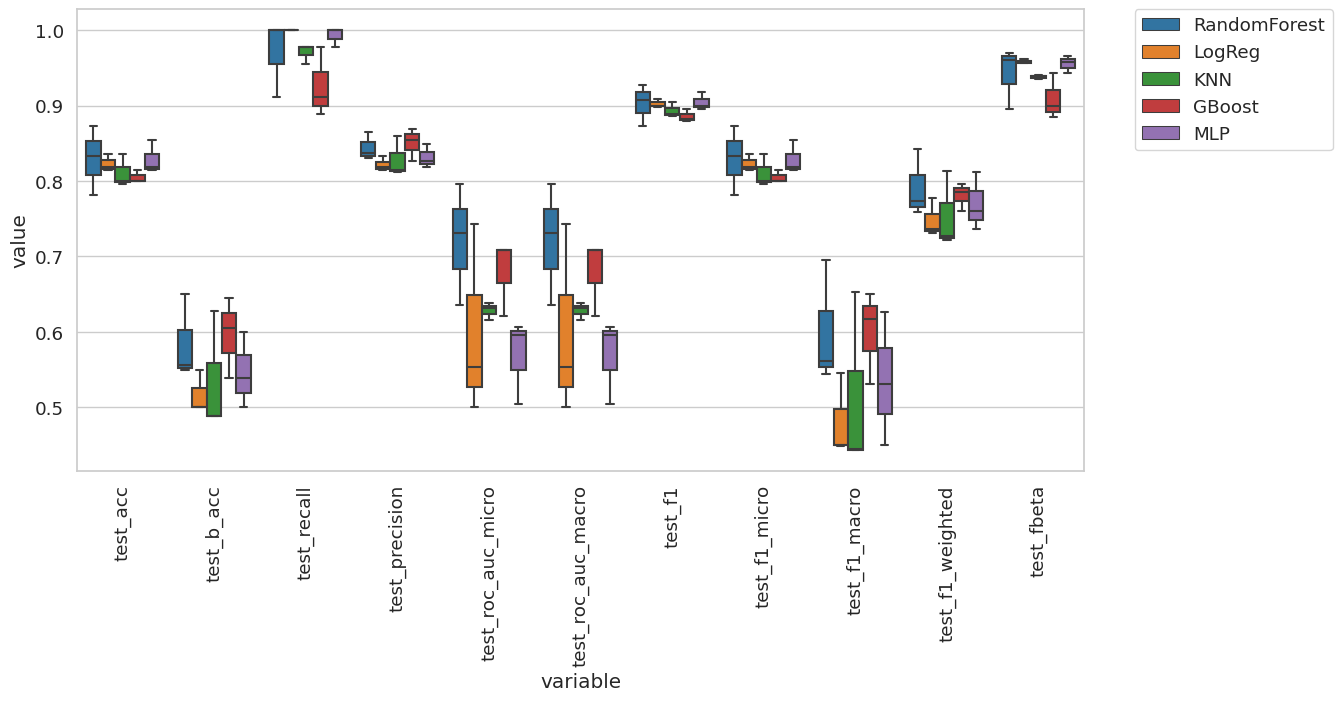

In [34]:
df_plot = df_scores.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Inspect feature importances

## Random Forest

Text(0.5, 1.0, 'RandomForest')

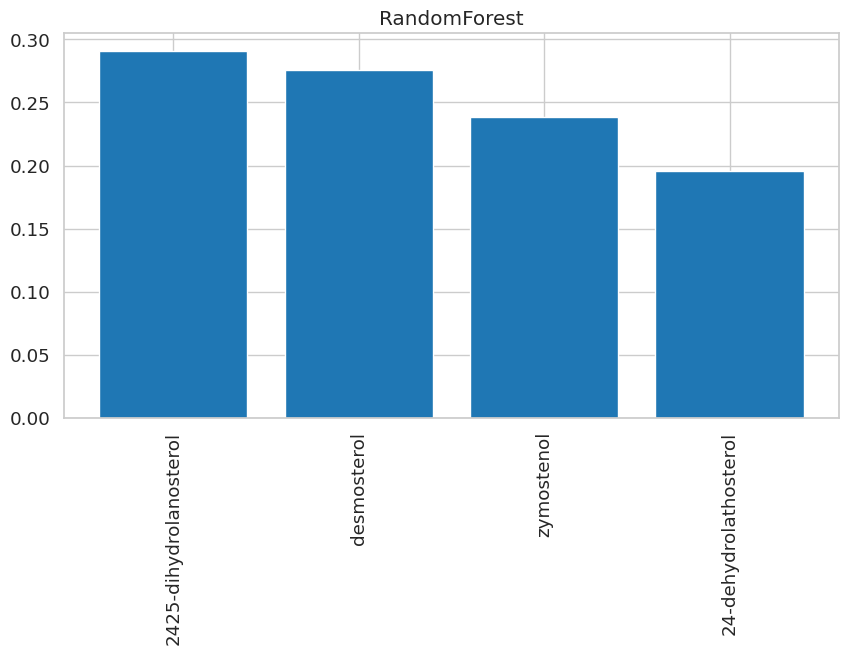

In [24]:
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_rf["var"], df_fi_rf["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"RandomForest")

## Gradient Boosting

In [ ]:
model = "GBoost"
estimators, score = fit_modelComparison(X, y, target, model=model, randomState=11)

fi_gboost = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
df_fi_gboost = pd.DataFrame(fi_gboost, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_gboost

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_gboost.iloc[:10,]["var"], df_fi_gboost.iloc[:10,]["fi"], color="darkred")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")

## Logistic Regression

In [ ]:
model = "LogReg"
estimators, score = fit_modelComparison(X, y, target, model=model, randomState=11)

fi_logreg = list(zip(estimators[0].best_estimator_[model].coef_[0], columnOrderAfterPreprocessing))
df_fi_logreg = pd.DataFrame(fi_logreg, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_logreg

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_logreg.iloc[:10]["var"], df_fi_logreg.iloc[:10]["fi"], color="orange")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")